In [1]:
import torch
import torchvision

In [3]:
!curl -O https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10160  100 10160    0     0  48036      0 --:--:-- --:--:-- --:--:-- 48151


In [2]:
# Continue with regular imports
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !mv pytorch-deep-learning/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4393, done.
remote: Total 4393 (delta 0), reused 0 (delta 0), pack-reused 4393 (from 1)
Receiving objects: 100% (4393/4393), 764.14 MiB | 20.87 MiB/s, done.
Resolving deltas: 100% (2656/2656), done.
Updating files: 100% (248/248), done.


In [4]:
import os
import zipfile
from pathlib import Path
import requests

data_path = Path("/Users/benjaminbrooke/PycharmProjects/Python_PyTroch/PyTorch for Deep Learning Bootcamp - Udemy/Section 6 - PyTorch Customer Datasets/")
image_path = data_path / "pizza_steak_sushi"

In [5]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [6]:
from going_modular.going_modular import data_setup
from torchvision import transforms

IMG_SIZE = 224
manaul_transforms = transforms.Compose([transforms.Resize((IMG_SIZE,IMG_SIZE)),
                                         transforms.ToTensor()])

In [8]:
batch_size = 32

train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(
    train_dir=train_dir,
    test_dir=test_dir,
    transform=manaul_transforms,
    batch_size=batch_size
)

In [11]:
image_batch, label_batch = next(iter(train_dataloader))

/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [13]:
print(image_batch[0].shape), print(label_batch[0])

torch.Size([3, 224, 224])
tensor(1)


(None, None)

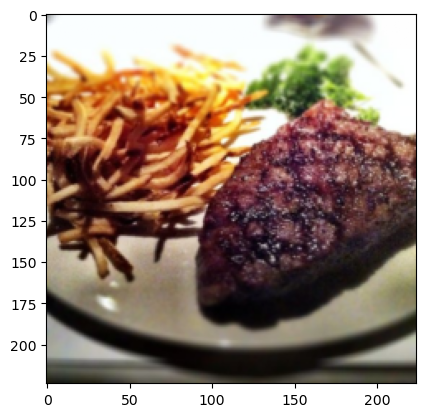

In [16]:
import matplotlib.pyplot as plt

plt.imshow(image_batch[0].permute(1,2,0))